<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش
</font>
</h1>

<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
This project has 5 steps:
</font>
</p>
<ol>
  <li><code><b>Data preprocessing</b></code>: A series of preprocessing steps are performed on the entire data, such as handling the missing data</li>
  <li><code><b>Exploration</b></code>: I answer a series of high-level questions and obtain an intuitive view of the company's financial information.</li>
  <li><code><b>Study of target markets</b></code>: I will analyze different locations of sale and supply and I will check which countries, despite having many customers, experience little sales.</li>
  <li><code><b>Customer value</b></code>: Using the RFM practical criteria, I divide the company's customers into 7 categories, each of which has its meaning and behavior in terms of marketing.</li>
  <li><code><b>Customer retention rate analysis</b></code>: What percentage of customers buy from this company in the following months after their first purchase.?</li>
</ol>

<br><em><b>I only used Numpy, Pandas, Matplotlib, and Seaborn in this project</b></em>


<h2 style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
The Dataset
</font>
</h2>



<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
The data of this project is available in the Excel file <code>sales.xlsx</code> and the descriptions of the columns of the dataset are given in the table below.
</font>
</p>

<center>
<div  style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|Column|Description|
|:------:|:---:|
|<code>InvoiceNumber</code>|A 6-digit number uniquely assigned to each invoice. If the beginning of this number starts with the letter C, it means that the invoice has been cancelled.|
|<code>ProductCode</code>|A 5-digit number that is uniquely assigned to each type of product.|
|<code>ProductName</code>|Product's name|
|<code>Quantity</code>|The number of orders of a product type in the invoice|
|<code>InvoiceDate</code>|Invoice creation date|
|<code>UnitPrice</code>|The price of a product type per unit|
|<code>CusotmerId</code>|A 5-digit number that is uniquely assigned to each customer.|
|<code>Country</code>|The name of the customer's country of residence|

</font>
</div>
</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import datetime
from datetime import timedelta 

In [ ]:
# in order to use read_excel in the next cell
!pip install openpyxl

In [2]:
df = pd.read_excel("sales.xlsx")
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.shape

(525461, 8)

<h1 style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Pre-processing   
</font>
</h1>

<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
In the first step of this project, I apply a series of pre-processing steps on the data in order to have better quality data for the next steps of the project. In addition to these steps, I also answered some analytical questions.
</font>
</p>

<h2 style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Pre-processing: Part 1    
</font>
</h2>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>    
First, I drop the invoices whose customer ID (<code>CustomerId</code>) is not available.<br>
I do this on a copy of the data frame named <code>df_no_missing_CustomerId</code>
    
</font>
</p>


In [4]:
df_no_missing_CustomerId = df.copy()
df_no_missing_CustomerId.dropna(subset=['CustomerId'], inplace=True)
df_no_missing_CustomerId.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>    
Then, I keep only one row out of all the duplicated rows. I do this on a copy of the previous dataframe named <code>df_no_duplicate</code>.
</font>
</p>


In [5]:
df_no_duplicate = df_no_missing_CustomerId.copy()
df_no_duplicate = df_no_duplicate.drop_duplicates()
df_no_duplicate.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>        
I also drop the rows where (<code>UnitPrice</code>) is zero or a negative number. I do this on a copy of the previous dataframe named <code>df_no_missing_price</code>.
</font>
</p>


In [6]:
df_no_missing_price = df_no_duplicate.copy()

df_no_missing_price = df_no_missing_price[df_no_missing_price['UnitPrice'] > 0]

df_no_missing_price.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


<h2 style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Pre-processing: Part 2    
</font>
</h2>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>    
Now I calculate what percentage of all orders are canceled and store the rounded number in a variable named <code>percentage_cancelled_orders</code>.
</font>
</p>


In [7]:
df_no_missing_price[df_no_missing_price['InvoiceNumber'].str.startswith('C', na = False)].nunique().iloc[0]

4372

In [8]:
len_unique_all = df_no_missing_price.InvoiceNumber.nunique()
len_unique_cancelled = len(df_no_missing_price[df_no_missing_price['InvoiceNumber'].str.startswith('C', na = False)]['InvoiceNumber'].unique())

percentage_cancelled_orders = round((len_unique_cancelled / len_unique_all) * 100)

print("percentage_cancelled_orders = ", percentage_cancelled_orders)

percentage_cancelled_orders =  19


<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>  
In this part, I need to find the five customers with the highest number of order cancellations using the <code>df_no_missing_price</code> dataframe and store their IDs in the form of a list (in descending order) in <code>top_cancelling_customers</code> .
</font>
</p>


In [9]:
f_list = df_no_missing_price[df_no_missing_price['InvoiceNumber'].str.startswith('C', na = False)].drop_duplicates(subset=['InvoiceNumber', 'CustomerId'])['CustomerId'].value_counts().index[:5].to_list()
top_cancelling_customers = [str(element) for element in f_list]
top_cancelling_customers

['14911.0', '14527.0', '15311.0', '14156.0', '17841.0']

<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>  
Now, as the last stage of preprocessing, I delete the rows related to canceled orders from the dataframe. For this, I use a copy of the <code>df_no_missing_price</code> dataframe called <code>df_no_cancelled_invoice</code> and apply the changes to this dataframe.
</font>
</p>


In [10]:
df_no_canceled_invoice = df_no_missing_price.copy()

index_del = df_no_canceled_invoice[df_no_canceled_invoice['InvoiceNumber'].str.startswith('C', na = False)].index

df_no_canceled_invoice = df_no_canceled_invoice.drop(index_del)

<h1 style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
EDA & Questions   
</font>
</h1>

<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
In this step of the project, I will analyze the orders more and by answering some questions and drawing some graphs, I will get a better view of the company's financial information.
</font>
</p>

In [11]:
df = df_no_canceled_invoice.copy()
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Question 1
</font>
</h2>

<p  style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
How many are the remaining unique invoices?        
</font>
</p>

In [12]:
number_of_orders = len(df['InvoiceNumber'].unique())
number_of_orders

19213

<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Question 2
</font>
</h2>

<p  style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Over what period of time was this data collected? I store the answer as a tuple in the <code>window_period</code> variable, which contains the first time and the last time, respectively.
</font>
</p>

In [13]:
window_period = (min(df.InvoiceDate), max(df.InvoiceDate))
window_period

(Timestamp('2009-12-01 07:45:00'), Timestamp('2010-12-09 20:01:00'))

<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Question 3
</font>
</h2>

<p  style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Using a bar chart, I show how many unique invoices have been issued on each day of the week (Monday, Tuesday, etc.)?
</font>
</p>

Text(0.5, 1.0, 'Number of orders for different Days')

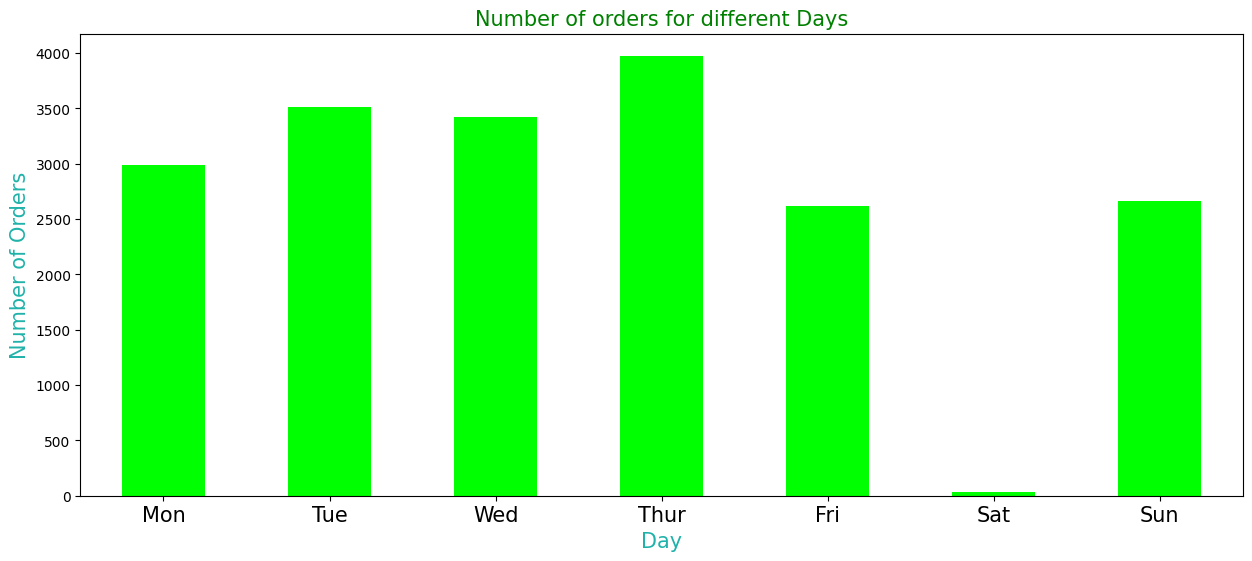

In [14]:
fig1, ax1 = plt.subplots(figsize=(15, 6))

# extract the day of the week from the InvoiceDate column
df['day_of_week'] = pd.to_datetime(df["InvoiceDate"]).dt.day_of_week

# group by day of the week and count the number of unique orders
df.groupby('day_of_week')['InvoiceNumber'].nunique().sort_index().plot(ax=ax1, kind="bar", color="lime")

# set the xticklabels to the names of the days
days = ('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun')
ax1.set_xticklabels(days, rotation=0, size=15)

# set the labels and title
ax1.set_xlabel('Day', color='lightseagreen', size=15)
ax1.set_ylabel('Number of Orders', color='lightseagreen', size=15)
ax1.set_title('Number of orders for different Days', color='green', size=15)

<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Question 4
</font>
</h2>

<p  style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Now I draw a bar graph of the total sales for each month of each year. The total sales of each row of the dataframe is obtained by multiplying (column <code>UnitPrice</code>) by (column <code>Quantity</code>).
</font>
</p>

Text(0.5, 1.0, 'Number of orders for different Months')

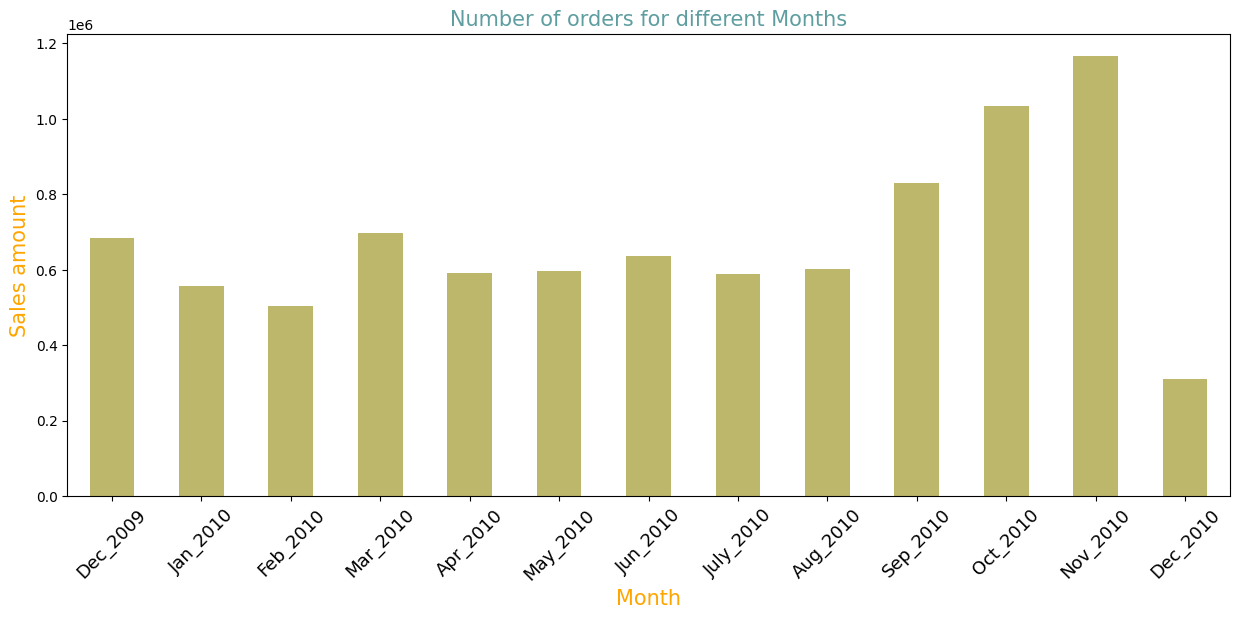

In [15]:
fig2, ax2 = plt.subplots(figsize=(15, 6))

# create a new column for the total price of each row
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# extract the month and year from the InvoiceDate column
df['month_year'] = pd.to_datetime(df["InvoiceDate"].sort_values()).dt.strftime("%b_%Y")

# group by month and year and sum the total price
df.groupby('month_year', sort=False)['TotalPrice'].sum().plot(ax=ax2, kind="bar", color="darkkhaki")

# set the xticklabels to the month and year and change the jul_2010 label
labels = ax2.get_xticklabels()
labels[7] = "July_2010"
ax2.set_xticklabels(labels, rotation=45, size=13)

# set the labels and title
ax2.set_xlabel("Month", size=15, color="orange")
ax2.set_ylabel("Sales amount", size=15, color="orange")
ax2.set_title("Number of orders for different Months", color="cadetblue", size=15)

<h1 style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Market Research
</font>
</h1>

<p  style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
In this step of the project, I will group the countries in terms of the amount of sales and the number of customers, and I will analyze the sales and supply location by drawing a functional diagram.
</font>
</p>

<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
1. Scatter diagram of the amount of sales and the number of customers of the countries
</font>
</h2>

<p  style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
In this step, on a scatter chart, I show different countries based on their sales and number of customers. In addition, I divide the countries into 4 groups according to the amount of sales and the number of customers, and I determine the color of the points related to the countries based on their group.
</font>
</p>

<p  style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
If the amount of sales is <code>SA</code> and its third quartile is <code>qSA</code>, the number of customers is <code>CC</code> and its third quartile is <code>qCC</code>, 4 groups of countries are defined as below:
</font>
</p>

<center>
<div  style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <b>The Group</b> | <b>Group's Name</b> | <b>Condition</b> | <b>Color</b> |
| :---: | :---: | :---: | :---: |
| ۱ | Highest customer & revenue | <code dir=ltr>SA > qSA</code> و <code dir=ltr>CC > qCC</code> | <code>red</code> |
| ۲ | High customer & low revenue | <code dir=ltr>SA < qSA</code> و <code dir=ltr>CC > qCC</code> | <code>blue</code> |
| ۳ | High revenue & low customer | <code dir=ltr>SA > qSA</code> و <code dir=ltr>CC < qCC</code> | <code>green</code> |
| ۴ | Low customer & revenue | <code dir=ltr>SA < qSA</code> و <code dir=ltr>CC < qCC</code> | <code>cyan</code> |

</font>
</div>
</center>

<p  style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
To draw the diagram, I went through the following steps:

<ol >
  <li>First, I deleted the orders related to the United Kingdom.</li>
  <li>For each country, I calculated the number of unique customers and the amount of sales.</li>
  <li>I calculated the third quarter for the amount of sales and the number of customers.</li>
  <li>Using the above explanation, I divided the countries into four groups.</li>
</ol>
</font>
</p>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
In the end, I showed the countries of France, Spain and the Netherlands on the map.
</font>
</p>



In [16]:
# prepare the dataframe
index_del = df[df.Country == "United Kingdom"].index
dff = df.drop(index_del).copy()
dff["Sales_amount"] = dff['UnitPrice'] * dff['Quantity']

dff_grouped = dff.groupby('Country')[['CustomerId', 'Sales_amount']].agg({'CustomerId': 'nunique', 'Sales_amount': 'sum'})
quan_3 = dff_grouped.quantile(.75)
qCC = quan_3.iloc[0]
qSA = quan_3.iloc[1]

g1 = dff_grouped[(dff_grouped['CustomerId'] > qCC) & (dff_grouped['Sales_amount'] > qSA)]
g2 = dff_grouped[(dff_grouped['CustomerId'] > qCC) & (dff_grouped['Sales_amount'] < qSA)]
g3 = dff_grouped[(dff_grouped['CustomerId'] < qCC) & (dff_grouped['Sales_amount'] > qSA)]
g4 = dff_grouped[(dff_grouped['CustomerId'] < qCC) & (dff_grouped['Sales_amount'] < qSA)]

''

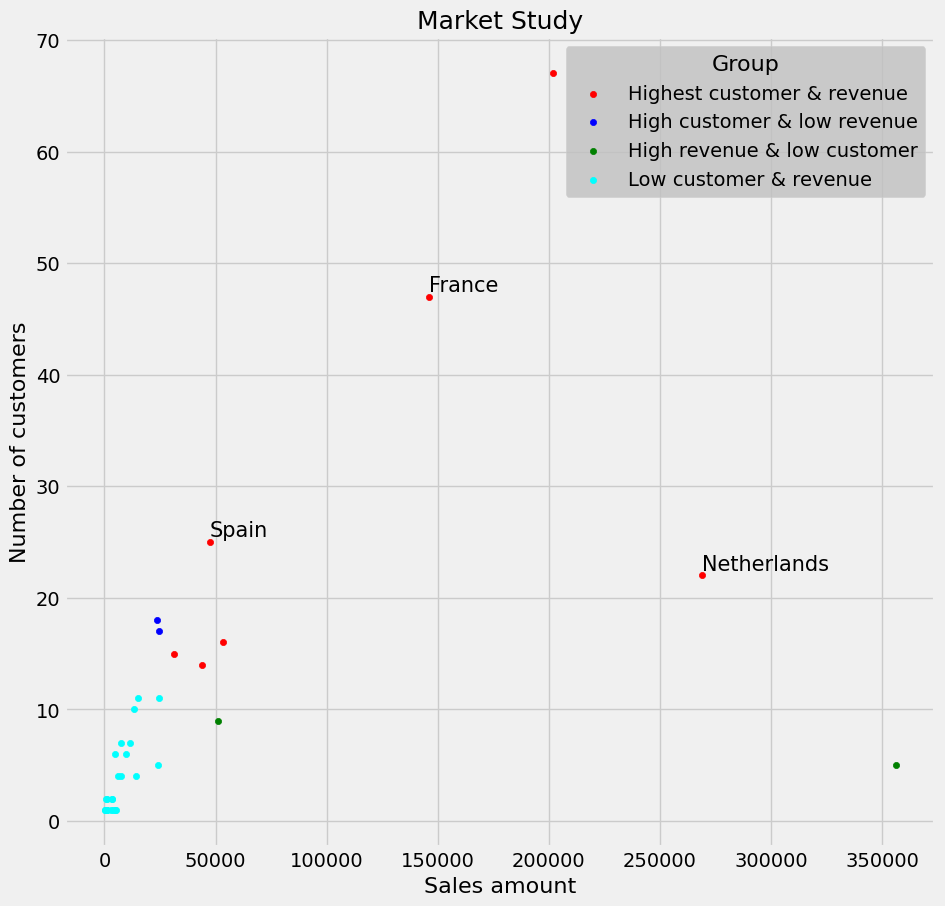

In [17]:
plt.style.use('fivethirtyeight')
fig , ax = plt.subplots(figsize=(10, 10))

#ax.scatter(markersize = 20, c=, label=)
ax.scatter(x = g1['Sales_amount'], y = g1['CustomerId'], s = 20, c='red', label='Highest customer & revenue')
ax.scatter(x = g2['Sales_amount'], y = g2['CustomerId'], s = 20, c='blue', label='High customer & low revenue')
ax.scatter(x = g3['Sales_amount'], y = g3['CustomerId'], s = 20, c='green', label='High revenue & low customer')
ax.scatter(x = g4['Sales_amount'], y = g4['CustomerId'], s = 20, c='cyan', label='Low customer & revenue')

ax.text(dff_grouped.loc['France'].iloc[1], dff_grouped.loc['France'].iloc[0] + 0.5, "France",fontsize=15)
ax.text(dff_grouped.loc['Spain'].iloc[1], dff_grouped.loc['Spain'].iloc[0] + 0.5, "Spain",fontsize=15)
ax.text(dff_grouped.loc['Netherlands'].iloc[1], dff_grouped.loc['Netherlands'].iloc[0] + 0.5, "Netherlands",fontsize=15)

ax.set_title("Market Study", fontsize=18)
ax.set_xlabel("Sales amount", fontsize=16)
ax.set_ylabel("Number of customers", fontsize=16)
ax.legend(title="Group", title_fontsize=16, frameon=True, facecolor='silver', fontsize=14)
;

<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
2. RFM
</font>
</h2>

<p  style="line-height:200%;font-family:vazir;font-size:medium">
<font>
To continue the marketing related matters, in this step, I grouped customers based on their value.
To do this, I used a well-known method in the field of customer behavior analysis called <a href="https://en.wikipedia.org/wiki/RFM_(market_research)"><i>RFM</i></a>.
In this method, three criteria are calculated for each customer:
</font>
</p>


<div  style="line-height:200%;font-family:vazir;font-size:medium">
<font>
    <ol>
        <li>
            <b>Recency</i>:</b> The number of days that have passed since the customer's last purchase.
        </li>
        <li>
            <b><i>Frequency</i>:</b> Number of times the customer has made a purchase.
        </li>
        <li>
            <b><i>Monetary Value</i>:</b> Total revenue that the company has received from a customer.
        </li>
    </ol>
</font>
</div>


<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font> 
These criteria indicate important indicators in customer behavior. For example, the more recent a customer has made a purchase, the more likely they will buy from us again. The more times a customer buys, the more satisfied the customer is, and the more revenue a customer generates for the company can differentiate them from other buyers.
</font>
</p>


<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<i>2.1</i> Recency
</font>
</h2>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
First, I need to calculate the <i>Recency</i> criterion for each (<code>CustomerId</code>).
So I need to calculate the number of days since the customer's last purchase compared to one day after the last date in the dataset (column <code>InvoiceDate</code>).
</font>
</p>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>So first, I find the last date in the dataset, and after summing it with <code>1</code>, I store the result in the <code>last_day</code> variable..
</font>
</p>

In [18]:
last_day = max(df.InvoiceDate) + timedelta(days=1)
last_day

Timestamp('2010-12-10 20:01:00')

<p  style=text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Now I can find for each customer the date of their last purchase and calculate the number of days past <code>last_day</code>.
     <br>
I saved the result in a dataframe named <code>df_customer_segments</code> and with two columns <code>CustomerId</code> and <code>Recency</code>.
</font>
</p>

In [19]:
df_customer_segments = pd.DataFrame({'Recency': (last_day - df.groupby('CustomerId')['InvoiceDate'].agg('max')).dt.days}).reset_index()
df_customer_segments.head()

,CustomerId,Recency
0,12346.0,165
1,12347.0,3
2,12348.0,74
3,12349.0,43
4,12351.0,11


<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<i>2.2</i> Frequency
</font>
</h2>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Now I need to calculate how many <b>unique</b> purchases each customer has made so far. I add the result in a column named <code>Frequency</code> to the <code>df_customer_segments</code> data frame.
</font>
</p>

In [20]:
df_customer_segments['Frequency'] = df.groupby('CustomerId').InvoiceNumber.nunique().values
df_customer_segments.head()

,CustomerId,Recency,Frequency
0,12346.0,165,11
1,12347.0,3,2
2,12348.0,74,1
3,12349.0,43,3
4,12351.0,11,1


<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<i>2.3</i> Monetary Value
</font>
</h2>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Here, I calculated how much was the total purchase of each customer? To do this, I multiplied (<code>UnitPrice</code>) by (<code>Quantity</code>) and used the result to calculate the total purchase of each customer.
I added the result in a column named <code>MonetaryValue</code> to the <code>df_customer_segments</code> dataframe.
</font>
</p>

In [22]:
df["sales_amount"] = df.UnitPrice * df.Quantity

In [23]:
df_customer_segments['MonetaryValue'] = df.groupby('CustomerId').sales_amount.agg('sum').values
df_customer_segments.head()

,CustomerId,Recency,Frequency,MonetaryValue
0,12346.0,165,11,372.86
1,12347.0,3,2,1323.32
2,12348.0,74,1,222.16
3,12349.0,43,3,2671.14
4,12351.0,11,1,300.93


<h2   style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<i>2.4</i> Grouping of each criterion
</font>
</h2>

<p   style=" text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Now I need to divide each of these three criteria into 4 different groups based on the first, second and third quartiles as shown below:
</font>
</p>

<center>
<div   style=" line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <b>The Group</b> | <b>Condition</b> |
| :---: | :---: | 
| 1 | <code dir=ltr>value <= Q1</code> | 
| 2 | <code dir=ltr>Q1 < value <= Q2</code> | 
| 3 | <code dir=ltr>Q2 < value <= Q3</code> | 
| 4 | <code dir=ltr>Q3 < value</code> | 

</font>
</div>
</center>

<p style=" text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
I did this for each of these three criterias and stored the results in three other columns named <code>F_quartile</code>, <code>R_quartile</code> and <code>M_quartile</code>.
</font>
</p>

In [39]:
def get_quartile(arr):
    qu = np.quantile(arr, [0.25, 0.5, 0.75])
    output = []
    for value in arr:
        if value <= qu[0]:
            output.append("1")
        elif value > qu[0] and value <= qu[1]:
            output.append("2")
        elif value > qu[1] and value <= qu[2]:
            output.append("3")
        elif value > qu[2]:
            output.append("4")
    return output

In [40]:
df_customer_segments['R_quartile'] = get_quartile(df_customer_segments['Recency'])
df_customer_segments['F_quartile'] = get_quartile(df_customer_segments['Frequency'])
df_customer_segments['M_quartile'] = get_quartile(df_customer_segments['MonetaryValue'])
df_customer_segments.head()

,CustomerId,Recency,Frequency,MonetaryValue,R_quartile,F_quartile,M_quartile,RFM,Segment
0,12346.0,165,11,372.86,4,4,2,0 4\n1 1\n2 3\n3 2\n4 ...,Normal
1,12347.0,3,2,1323.32,1,2,3,0 4\n1 1\n2 3\n3 2\n4 ...,Normal
2,12348.0,74,1,222.16,3,1,1,0 4\n1 1\n2 3\n3 2\n4 ...,Normal
3,12349.0,43,3,2671.14,2,3,4,0 4\n1 1\n2 3\n3 2\n4 ...,Normal
4,12351.0,11,1,300.93,1,1,1,0 4\n1 1\n2 3\n3 2\n4 ...,Normal


<h2   style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<i>2.5</i> R + F + M
</font>
</h2>

<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Now by putting together the values of the columns
    <code dir=ltr>[R_quartile, F_quartile, M_quartile]</code>
I calculated the final <i>RFM</i> value and stored it in a column with the same name.
</font>
</p>

In [41]:
df_customer_segments['RFM'] = df_customer_segments.R_quartile + df_customer_segments.F_quartile + df_customer_segments.M_quartile
df_customer_segments.head()

,CustomerId,Recency,Frequency,MonetaryValue,R_quartile,F_quartile,M_quartile,RFM,Segment
0,12346.0,165,11,372.86,4,4,2,442,Normal
1,12347.0,3,2,1323.32,1,2,3,123,Normal
2,12348.0,74,1,222.16,3,1,1,311,Normal
3,12349.0,43,3,2671.14,2,3,4,234,Normal
4,12351.0,11,1,300.93,1,1,1,111,Normal


<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<i>2.6</i> Grouping of customers
</font>
</h2>

<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Now, based on the values of the <code>RFM</code> column and according to the table below, I grouped the customers and stored their group names in a column called <code>Segment</code>.
</font>
</p>

<center>
<div  style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <b>Segment</b> | <b>RFM</b> |
| :---: | :---: | 
| Best | <code dir=ltr>144</code> | 
| AlmostLost | <code dir=ltr>344</code> | 
| LostBigSpenders | <code dir=ltr>444</code> | 
| LostCheap | <code dir=ltr>441</code> | 
| Loyal | <code dir=ltr>X4X</code> | 
| BigSpenders | <code dir=ltr>XX4</code> | 

</font>
</div>
</center>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3
    <span style="color:purple"><b>*</b></span>
    If a customer was not included in any of the groups in the table, I considered her group to be <i>Normal</i>.
    <br>
    <span style="color:purple"><b>*</b></span>
    Also, if an RFM can be placed in two groups of the table, priority is given to the group that is <b>higher</b> in the table.
</font>
</p>


In [46]:
def group_rfm(input):
    output = []
    for i in input:
        if i == 144:
            output.append('Best')
        elif i == 344:
            output.append('AlmostLost')
        elif i == 444:
            output.append('LostBigSpenders')
        elif i == 441:
            output.append('LostCheap')
        elif str(i)[1] == '4':
            output.append('Loyal')
        elif str(i)[2] == '4':
            output.append('BigSpenders')
        else:
            output.append('Normal')
    return output

In [47]:
df_customer_segments['Segment'] = group_rfm(df_customer_segments['RFM'])
df_customer_segments.head()

,CustomerId,Recency,Frequency,MonetaryValue,R_quartile,F_quartile,M_quartile,RFM,Segment
0,12346.0,165,11,372.86,4,4,2,442,Loyal
1,12347.0,3,2,1323.32,1,2,3,123,Normal
2,12348.0,74,1,222.16,3,1,1,311,Normal
3,12349.0,43,3,2671.14,2,3,4,234,BigSpenders
4,12351.0,11,1,300.93,1,1,1,111,Normal


<h1 style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Customer retention analysis
</font>
</h1>

<p  style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Usually, it is difficult and expensive for a company to attract new customers because for this the marketing team needs to use different methods of advertising and communicating with customers.
Therefore, attention should be paid as much as possible to maintaining current customers and increasing their retention.
<br>To facilitate such work, in the last step of the project, I will draw a diagram that represents the retention rate of the company's customers to help the marketing team.
</font>
</p>

In [ ]:
# df = pd.read_csv("preprocessed_sales.csv", parse_dates=["InvoiceDate"])
# df.head()

<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Retention chart
</font>
</h2>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
I drew the following graph, the vertical axis of which shows the month when a customer had a transaction with the company for the first time, and the horizontal axis shows how many percent of new customers remain customers of the company in the months after the first transaction and register at least one invoice per month.
</font>
</p>

In [29]:
# Create a new column "InvoiceMonth" with a datetime object representing the first day of the month of each transaction
df['InvoiceMonth'] = df['InvoiceDate'].apply(lambda x: datetime.datetime(x.year, x.month, 1))

# Create a new column "CohortMonth" with a datetime object representing the first month that a customer made a purchase
df['CohortMonth'] = df.groupby('CustomerId')['InvoiceMonth'].transform('min')

df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country,day_of_week,TotalPrice,month_year,sales_amount,InvoiceMonth,CohortMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,1,83.4,Dec_2009,83.4,2009-12-01,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,81.0,Dec_2009,81.0,2009-12-01,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,81.0,Dec_2009,81.0,2009-12-01,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,1,100.8,Dec_2009,100.8,2009-12-01,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1,30.0,Dec_2009,30.0,2009-12-01,2009-12-01


In [30]:
# Define a function to extract the year and month from a datetime column in a Pandas DataFrame
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

# Extract the year and month from the "InvoiceMonth" and "CohortMonth" columns using the get_date_int function
invoice_year, invoice_month = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month  = get_date_int(df, 'CohortMonth')

# Calculate the difference in years and months between the "InvoiceMonth" and "CohortMonth" columns
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

# Calculate the "CohortIndex" column by converting the difference in years and months to months, and adding one
df['CohortIndex'] = years_diff * 12 + months_diff + 1

# Select only the "CohortMonth" and "CohortIndex" columns of the DataFrame
df[['CohortMonth', 'CohortIndex']]

,CohortMonth,CohortIndex
0,2009-12-01,1
1,2009-12-01,1
2,2009-12-01,1
3,2009-12-01,1
4,2009-12-01,1
...,...,...
525456,2009-12-01,13
525457,2009-12-01,13
525458,2009-12-01,13
525459,2009-12-01,13


In [31]:
# Group the DataFrame by "CohortMonth" and "CohortIndex"
grouping = df.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of unique customer IDs in each (cohort month, cohort index) group
cohort_data = grouping['CustomerId'].apply(pd.Series.nunique)

# Reset the index of the DataFrame to create a flat table with columns for cohort month, cohort index, and customer count
cohort_data = cohort_data.reset_index()

# Reshape the DataFrame so that the columns represent the "CohortIndex" values,
# the rows represent the "CohortMonth" values, and the cell values represent the count of unique customer IDs
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerId')

cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,403.0,473.0,237.0
2010-01-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,116.0,38.0,NaN
2010-02-01,374.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,27.0,NaN,NaN
2010-03-01,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,35.0,NaN,NaN,NaN
2010-04-01,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,20.0,NaN,NaN,NaN,NaN
2010-05-01,254.0,40.0,43.0,44.0,45.0,65.0,54.0,20.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,270.0,47.0,51.0,55.0,62.0,77.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,186.0,29.0,34.0,55.0,54.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,162.0,33.0,48.0,52.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Select the first column of the "cohort_counts" DataFrame, which represents the count of customers in each cohort group
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the entire "cohort_counts" DataFrame by the "cohort_sizes" series, row-wise, to create a matrix of customer retention rates
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Multiply the entire "retention" DataFrame by 100 and round to two decimal places to create human-readable percentages
retention = retention.round(2) * 100

retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,100.0,35.0,33.0,43.0,38.0,36.0,38.0,34.0,34.0,36.0,42.0,50.0,25.0
2010-01-01,100.0,21.0,31.0,31.0,26.0,30.0,26.0,23.0,28.0,32.0,30.0,10.0,NaN
2010-02-01,100.0,24.0,22.0,29.0,25.0,20.0,19.0,29.0,25.0,28.0,7.0,NaN,NaN
2010-03-01,100.0,19.0,23.0,24.0,23.0,20.0,25.0,30.0,28.0,8.0,NaN,NaN,NaN
2010-04-01,100.0,19.0,19.0,16.0,18.0,22.0,28.0,26.0,7.0,NaN,NaN,NaN,NaN
2010-05-01,100.0,16.0,17.0,17.0,18.0,26.0,21.0,8.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,100.0,17.0,19.0,20.0,23.0,29.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,16.0,18.0,30.0,29.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,20.0,30.0,32.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


''

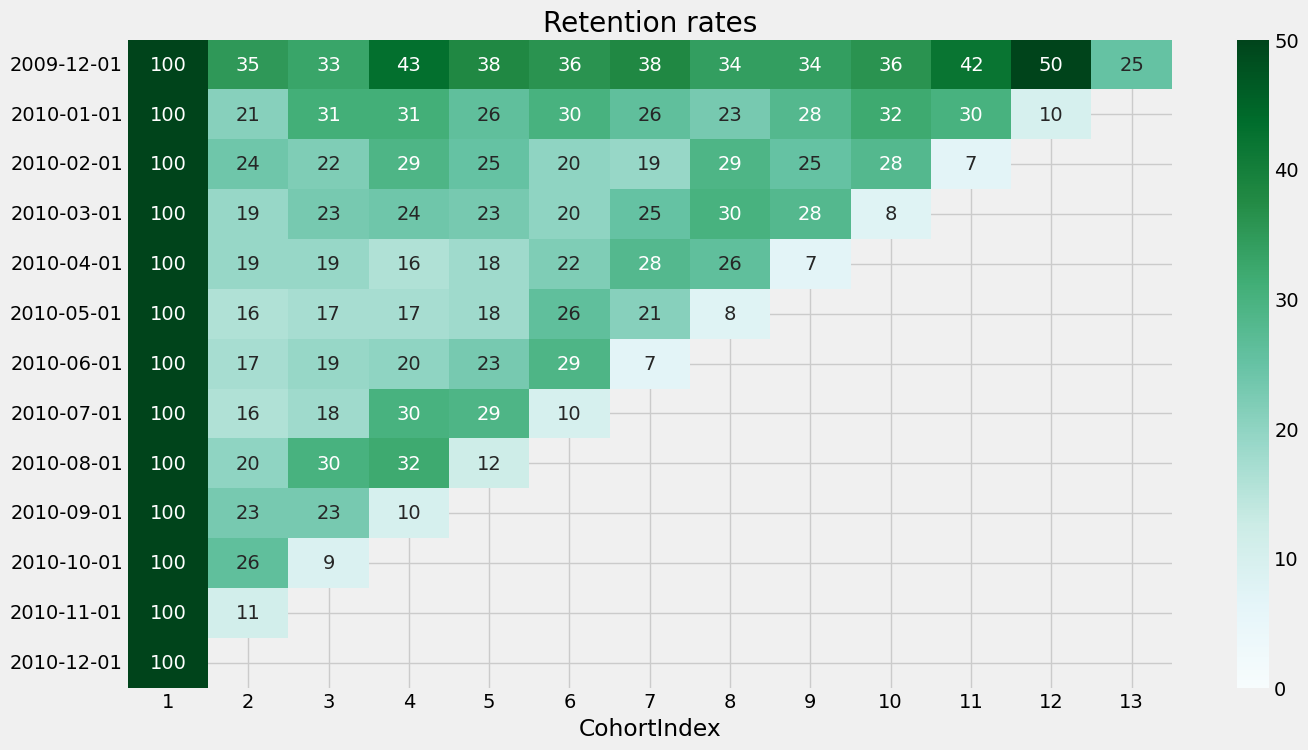

In [33]:
# Convert the index of the "retention" DataFrame to a date-based index for better labeling on the heatmap
retention.index = retention.index.date

fig, ax = plt.subplots(figsize=(15, 8))

# Create a heatmap using Seaborn's `sns.heatmap` function
ax = sns.heatmap(data = retention, annot = True,
                 fmt=".0f",
                 vmin = 0,
                 vmax = 50,
                 cmap = 'BuGn'
                    )
ax.set_title("Retention rates")
;

<center>
<h1 style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
THE END!
</font>
</h1>
</center>